In [88]:
import base64
import json
import logging
import os
import re
import shutil
import glob
import sys
import matplotlib as plt
import io
import pandas as pd

sys.path.insert(0, sys.path[0]+"/../")
## Baseline ##

##############
from openai import OpenAI
from config.openai import API_KEY, BASE_URL, temperature

In [89]:
# mat = pd.read_csv(r'C:\Users\LeeSeungYong\visplan\evaluation\dataset\matplotagent_data.csv')
# sample = mat.sample(1)
# print(sample['simple_instruction'].values[0])
# print('#'* 40)
# print(sample['expert_instruction'].values[0])


mat = pd.read_csv(r'C:\Users\LeeSeungYong\visplan\evaluation\dataset\viseval_data.csv')
sample = mat.sample(1)
# print(sample['simple_instruction'].values[0])
# print('#'* 40)
# print(sample['expert_instruction'].values[0])
print(sample['nl_queries'].values)
sample

["['Give me a group line chart showing the number of days with max humidity higher than 80 in different area each year.']"]


,id,vis_query_vis_part,vis_query_data_part,vis_query_VQL,chart,hardness,db_id,vis_obj_chart,vis_obj_x_name,vis_obj_y_name,vis_obj_x_data,vis_obj_y_data,vis_obj_classify,vis_obj_describe,vis_obj_sort,nl_queries,irrelevant_tables,query_meta,img_bs64
163,778,Visualize LINE,"{'sql_part': 'SELECT date , COUNT(date), zip_c...","SELECT date , COUNT(date), zip_code FROM weath...",Grouping Line,Hard,bike_1,line,date,COUNT(date),"[[2013, 2014, 2015]]","[[65, 259, 182], [102, 310, 207], [76, 285, 21...","['94041', '94063', '94107', '94301', '95113']","GROUP BY Location_Code, GROUP BY Date_in_Locat...",NaN,['Give me a group line chart showing the numbe...,"['trip', 'status']","[{'channel_specified': ['x', 'y', 'classify']}]",iVBORw0KGgoAAAANSUhEUgAAAmIAAAJCCAYAAABj+qvQAA...


In [90]:
print(mat['nl_queries'][0])

['Show all the faculty ranks and the number of students advised by each rank with a pie chart.', 'Return a pie on how many students are advised by each rank of faculty? List the rank and the number of students.', 'A pie chart about how many students are advised by each rank of faculty? List the rank and the number of students.', 'How many students are advised by each rank of faculty? List the rank and the number of students with a pie chart.']


In [91]:
import ast

len_queries = mat['nl_queries'].apply(lambda x : len(ast.literal_eval(x)))
len_queries
sum(len_queries)

2524

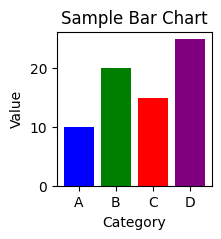

In [92]:
import matplotlib.pyplot as plt

def code_to_image(code):

    exec_globals = {"plt": plt, "io": io}
    exec_locals = {}

    try:
        exec(code, exec_globals, exec_locals)
        
        img_buffer = io.BytesIO()
        plt.savefig(img_buffer, format='png') 
        plt.close()         

        img_buffer.seek(0)
        img_base64 = base64.b64encode(img_buffer.read()).decode('utf-8')
        
        return img_base64
    except Exception as e:
        return str(e)
    
test2 = '''
import matplotlib.pyplot as plt

categories = ['A', 'B', 'C', 'D']
values = [10, 20, 15, 25]

plt.figure(figsize = (2,2))
plt.bar(categories, values, color=['blue', 'green', 'red', 'purple'])

plt.title('Sample Bar Chart')
plt.xlabel('Category')
plt.ylabel('Value')

plt.show()
'''

base64_code = code_to_image(test2)

In [93]:
# base64_code

In [94]:
tmp = {
    "simple_instruction": "Generate a series of boxplots using matplotlib and numpy libraries. The boxplots should include a basic plot, a notched plot, a plot with changed outlier point symbols, a plot without outlier points, a horizontal boxplot, and a plot with changed whisker length. The data for these plots should be randomly generated and reproducible. Each subplot should have one boxplot. The plots should be arranged in two rows and three columns.",
    "expert_instruction": "1. Import the required libraries: matplotlib.pyplot and numpy.\n2. Import the Polygon module from matplotlib.patches.\n3. Set the random seed for reproducibility using np.random.seed(19920215).\n4. Generate new fake data for the plot by creating arrays: spread, center, flier_high, flier_low, and data.\n   - Generate the spread array by multiplying np.random.rand(50) by 100.\n   - Generate the center array by multiplying np.ones(25) by 60.\n   - Generate the flier_high array by adding np.random.rand(10) multiplied by 100 to 150.\n   - Generate the flier_low array by multiplying np.random.rand(10) by -100.\n   - Concatenate the spread, center, flier_high, and flier_low arrays into the data array.\n5. Create a figure and subplots.\n6. Plot the basic boxplot on the first subplot and set the title to 'basic plot'.\n7. Plot a notched boxplot on the second subplot and set the title to 'notched plot'.\n8. Change the outlier point symbols on the third subplot and set the title to 'change outlier point symbols'.\n9. Create a boxplot without showing the outlier points on the fourth subplot and set the title to \"don't show outlier points\".\n10. Create a horizontal boxplot on the fifth subplot and set the title to 'horizontal boxes'.\n11. Change the whisker length on the sixth subplot and set the title to 'change whisker length'.\n12. Adjust the spacing and layout of the subplots using.\n13. Display the plot.",
    "id": 1
}

print(tmp['simple_instruction']),\
print(tmp['expert_instruction'])

Generate a series of boxplots using matplotlib and numpy libraries. The boxplots should include a basic plot, a notched plot, a plot with changed outlier point symbols, a plot without outlier points, a horizontal boxplot, and a plot with changed whisker length. The data for these plots should be randomly generated and reproducible. Each subplot should have one boxplot. The plots should be arranged in two rows and three columns.
1. Import the required libraries: matplotlib.pyplot and numpy.
2. Import the Polygon module from matplotlib.patches.
3. Set the random seed for reproducibility using np.random.seed(19920215).
4. Generate new fake data for the plot by creating arrays: spread, center, flier_high, flier_low, and data.
   - Generate the spread array by multiplying np.random.rand(50) by 100.
   - Generate the center array by multiplying np.ones(25) by 60.
   - Generate the flier_high array by adding np.random.rand(10) multiplied by 100 to 150.
   - Generate the flier_low array by mul

(None, None)

In [95]:
def image_to_base64(image_path):
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode('utf-8')
    
def base64_to_image(base64_string, output_path):
    with open(output_path, "wb") as img_file:
        img_file.write(base64.b64decode(base64_string))

In [96]:
matplotagent_bench = pd.read_csv(r'..\dataset\matplotagent_data.csv')
matplotagent_bench.iloc[0,:]


id                                                                    1
simple_instruction    Generate a series of boxplots using matplotlib...
expert_instruction    1. Import the required libraries: matplotlib.p...
img_bs64              iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAIAAAC6s0uzAA...
Name: 0, dtype: object

In [97]:
# from IPython.display import Image

# # base64_code = "iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAACMpJREFUeJzt1jEBACAMwDDAv+fhAo4mCnp2z8wsAAAyzu8AAADeMoAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBWywUmeQe85TrElQAAAABJRU5ErkJggg=="
# base64_to_image(base64_code, '../test.png')
# Image('../test.png')

In [98]:
viseval_bench = pd.read_csv(r'..\dataset\viseval_data.csv')
viseval_bench.tail(2)

,id,vis_query_vis_part,vis_query_data_part,vis_query_VQL,chart,hardness,db_id,vis_obj_chart,vis_obj_x_name,vis_obj_y_name,vis_obj_x_data,vis_obj_y_data,vis_obj_classify,vis_obj_describe,vis_obj_sort,nl_queries,irrelevant_tables,query_meta,img_bs64
1148,4034,Visualize LINE,"{'sql_part': ""SELECT year, max(salary), team_i...","Visualize LINE SELECT year, max(salary), team_...",Grouping Line,Medium,baseball_1,line,year,max(salary),"[[2000, 2001, 2002, 2003, 2004, 2005, 2006, 20...","[[13350000, 13350000, 13350000, 15000000, 1600...","['ARI', 'ATL', 'CHA']",NaN,NaN,"['The maximum salary of players in teams ARI, ...","['all_star', 'pitching']","[{'channel_specified': ['x', 'y', 'classify']}]",NaN
1149,4035,Visualize LINE,"{'sql_part': 'SELECT year, count(*), semester ...","Visualize LINE SELECT year, count(*), semester...",Grouping Line,Medium,college_2,line,year,semester,"[[2002, 2003, 2004, 2005, 2006, 2007, 2008, 20...","[[4, 4, 1, 3, 6, 2, 0, 1, 2], [2, 2, 2, 2, 1, ...","['Fall', 'Spring']",NaN,NaN,['How many 4-credit courses are there in each ...,"['advisor', 'prereq']","[{'channel_specified': ['x', 'y', 'classify']}]",NaN


In [99]:
id_list = [n for n in range(viseval_bench.shape[0])]
test_sample_id = 1149
viseval_bench['db_id']
db = viseval_bench.loc[test_sample_id,'db_id']

In [111]:
tmp = viseval_bench[viseval_bench['irrelevant_tables'].apply(lambda x : len(ast.literal_eval(x))) == 0]
type(tmp['irrelevant_tables'].sample(1).values[0])

str

In [101]:
viseval_bench['irrelevant_tables'].apply(lambda x : len(ast.literal_eval(x))).value_counts()

irrelevant_tables
2    820
1    226
0    104
Name: count, dtype: int64

In [102]:
# [f'evaluation\dataset\databases\{db}\{table}.csv' for table in ast.literal_eval(viseval_bench.loc[test_sample_id,'irrelevant_tables'])]
[f'evaluation\\dataset\\databases\\{db}\\{table}.csv' for table in ast.literal_eval(viseval_bench.loc[test_sample_id,'irrelevant_tables'])]

['evaluation\\dataset\\databases\\college_2\\advisor.csv',
 'evaluation\\dataset\\databases\\college_2\\prereq.csv']

In [103]:
test_sample_id = 0
database = viseval_bench.loc[test_sample_id,'db_id']
tables = viseval_bench.loc[test_sample_id,'irrelevant_tables']
data_path = [f'evaluation\\dataset\\databases\\{database}\\{table}.csv' for table in ast.literal_eval(tables)]
data_path

['evaluation\\dataset\\databases\\activity_1\\Faculty_Participates_in.csv',
 'evaluation\\dataset\\databases\\activity_1\\Participates_in.csv']

In [104]:
viseval_bench['nl_queries'].apply(lambda x : ast.literal_eval(x))

0       [Show all the faculty ranks and the number of ...
1       [Show all the faculty ranks and the number of ...
2       [A pie chart showing the number of faculty mem...
3       [Show the number of faculty members for each r...
4       [How many faculty members do we have for each ...
                              ...                        
1145    [Show the number of wines with score over 95 i...
1146    [A scatter plot illustrating the prices and sc...
1147    [From 1973 to 1979, show the maximum accelerat...
1148    [The maximum salary of players in teams ARI, A...
1149    [How many 4-credit courses are there in each s...
Name: nl_queries, Length: 1150, dtype: object